<a href="https://colab.research.google.com/github/mihika073/Deeplearning/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [ ]:
df = pd.read_csv('/content/SpotifyFeatures.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Target Variable
0,Movie,Chorus,Shri Ganesh Beej Mantra,4gENs0u19z0w4Kde2Zmd78,0,0.977,0.373,18800,0.0481,0.001120,F,0.0744,-16.570,Major,0.0929,79.478,04-Apr,0.0,0
1,Anime,Kensuke Ushio,inv(II.ii),2jr5tthOIFflk0UMByCPGO,25,0.952,0.356,46267,0.0254,0.838000,A,0.1100,-34.358,Minor,0.0703,61.002,05-Apr,0.0,0
2,Movie,Randy Newman,I Won't,1f1ZX6wBxg5V50qhY2PvOF,0,0.993,0.527,19533,0.0752,0.837000,G#,0.1380,-18.658,Minor,0.1630,90.735,04-Apr,0.0,0
3,Movie,Chorus,Shri Ganesh Beej Stotram,3W2sxpaG3vE5OqNxBQ5V19,0,0.980,0.473,19387,0.0648,0.000858,F,0.0994,-16.662,Major,0.0981,80.297,04-Apr,0.0,0
4,Children's Music,Tom's Music Box,"Sonata No. 4 in Eb, Op. 7, II",4fOBSpgFlrfgwJQ9tZ0L4K,15,0.368,0.582,32178,0.2580,0.001380,C,0.0717,-11.365,Major,0.3400,194.228,04-Apr,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Children's Music,Preschool Kids,Old Mac Donald,3dyEtBpAnajd9YfKdx7asb,4,0.334,0.731,38532,0.8500,0.755000,F,0.0821,-14.854,Major,0.0924,135.870,04-Apr,1.0,1
232721,Children's Music,Nursery Rhymes and Kids Songs,Goosey Goosey Gander (Wurlitzer),4tygYGKESZsvsHDjgHKeCS,2,0.995,0.544,118880,0.3950,0.951000,E,0.0906,-24.145,Major,0.0556,199.891,04-Apr,1.0,1
232722,Children's Music,Nursery Rhymes and Kids Songs,Pat a Cake for Bedtime,5IUdhVJhpNiwr3C5KMrPvn,0,0.865,0.551,120372,0.3580,0.906000,G,0.1170,-18.128,Minor,0.0520,170.851,03-Apr,1.0,1
232723,Children's Music,The Hit Crew Kids,There Was A Crooked Man,6M5S4rqzeAiLWO6mleneSF,0,0.585,0.891,51147,0.7880,0.000000,D,0.2870,-5.201,Major,0.0470,113.530,04-Apr,1.0,1


In [ ]:
df.drop(df.columns[[0,1,2,3,-2]],1,inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X= df

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[-7,-4])],remainder="passthrough")
X_train= np.array(ct.fit_transform(X))



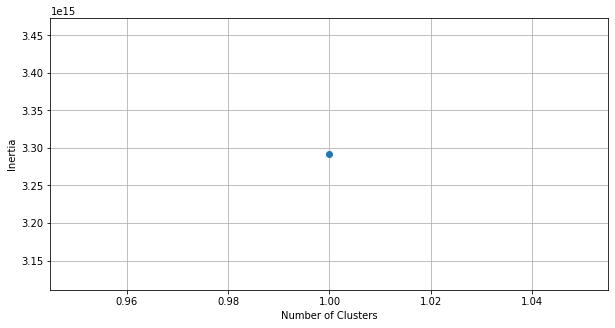

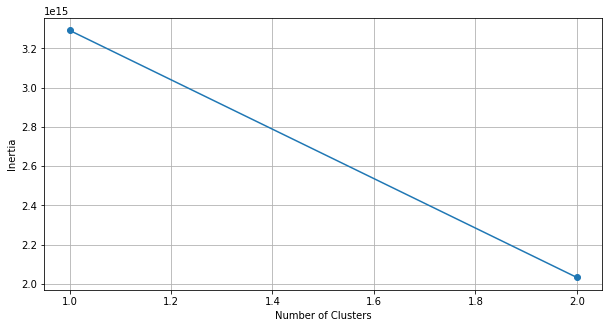

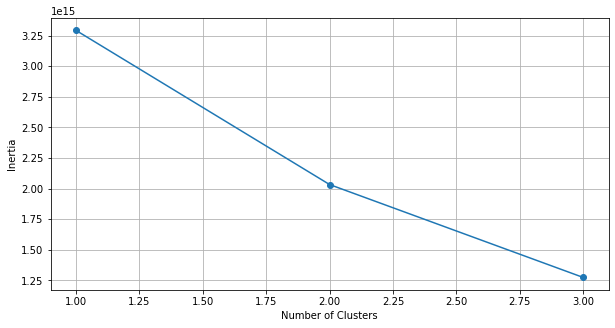

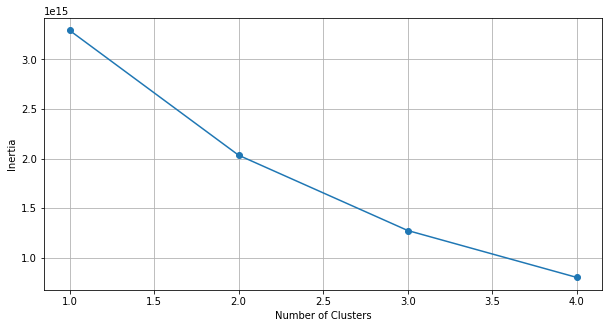

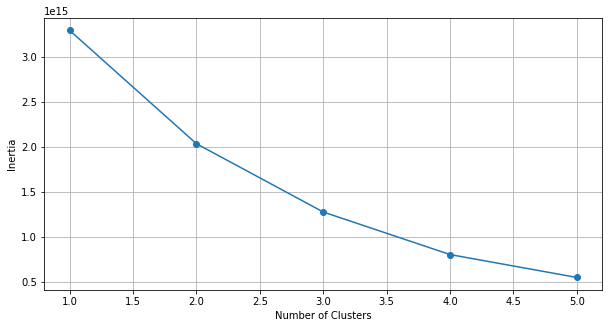

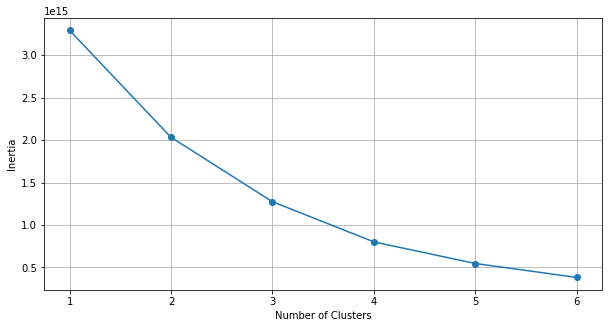

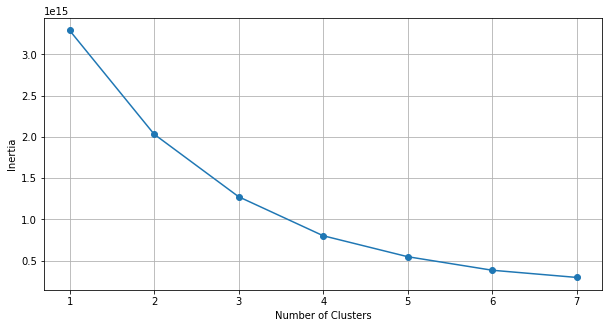

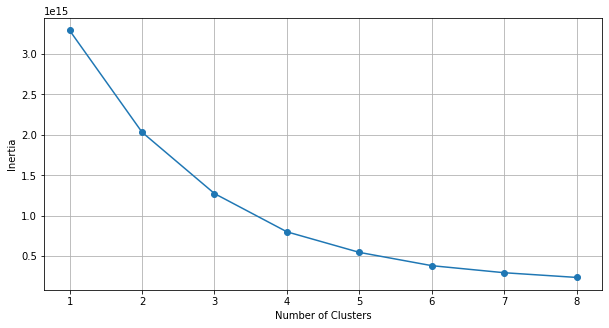

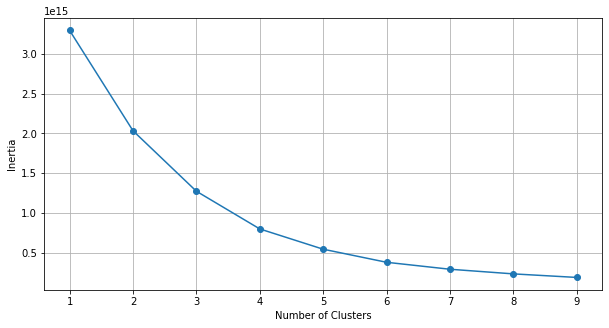

In [ ]:
def optimise_k_means(data, max_k):
    means=[]
    inertias=[]

    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

        fig = plt.subplots(figsize=(10,5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()
optimise_k_means(X_train,10)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, init="k-means++",random_state=5)
y_means = km.fit(X_train)
y_means

KMeans(n_clusters=5, random_state=5)

In [ ]:
y_means.cluster_centers_

array([[ 9.44707154e-02,  6.87006936e-02,  7.20933205e-02,
         1.20751955e-01,  1.00198678e-01,  1.05647794e-01,
         3.49370854e-02,  7.17796187e-02,  8.84290511e-02,
         6.14042222e-02,  1.15175034e-01,  6.64118324e-02,
         6.69811430e-01,  3.30188570e-01,  3.79537464e+01,
         4.32609655e-01,  5.60643361e-01,  1.56807499e+05,
         5.39374447e-01,  1.63969436e-01,  2.21727085e-01,
        -1.04176575e+01,  1.42486648e-01,  1.16910452e+02,
         4.85688938e-01],
       [ 9.38995215e-02,  8.73205742e-02,  5.80143541e-02,
         1.16626794e-01,  8.01435407e-02,  1.27990431e-01,
         4.24641148e-02,  9.27033493e-02,  8.37320574e-02,
         5.50239234e-02,  1.07057416e-01,  5.50239234e-02,
         6.84808612e-01,  3.15191388e-01,  2.62075359e+01,
         7.31860064e-01,  3.41143182e-01,  8.66779120e+05,
         3.33199414e-01,  4.51687908e-01,  2.72309330e-01,
        -1.66579037e+01,  1.81937620e-01,  1.03805859e+02,
         2.20859091e-01],
    

In [ ]:
clusassign= km.predict(X_train)

In [ ]:
X['kmeans_7']= km.labels_
X['kmeans_7']

0         0
1         0
2         0
3         0
4         0
         ..
232720    4
232721    4
232722    0
232723    4
232724    4
Name: kmeans_7, Length: 232725, dtype: int32

Text(0.5, 1.0, 'Scatterplot of Canonical Variables of 5 Clusters')

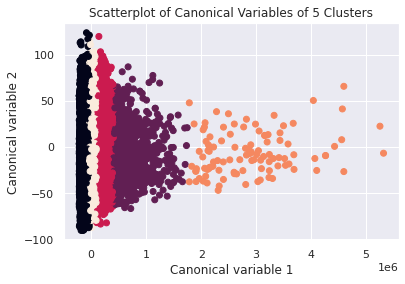

In [ ]:
from sklearn.decomposition import PCA
pca_2= PCA(2)
plot_columns= pca_2.fit_transform(X_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=km.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables of 5 Clusters')